## Importing Dependencies

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration

In [3]:
#printing the first 5 rows

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#no of rows and cols

df.shape

(768, 9)

In [5]:
#getting the statistical measures of the df

df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [6]:
#no of diabetics and non-diabetics

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

```
0 --> Non-Diabetic
1 --> Diabetic
```

## Data Cleaning

### Drop duplicates

In [7]:
print('Before dropping duplicates: ', df.shape)
df = df.drop_duplicates()
print('After dropping duplicates: ', df.shape)

Before dropping duplicates:  (768, 9)
After dropping duplicates:  (768, 9)


### Check for NULL values

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for missing values

In [9]:
print('No of missing values in Glucose: ',
      df[df['Glucose'] == 0].shape[0])
print('No of missing values in BloodPressure: ', 
      df[df['BloodPressure'] == 0].shape[0])
print('No of missing values in SkinThickness: ', 
      df[df['SkinThickness'] == 0].shape[0])
print('No of missing values in Insulin: ', 
      df[df['Insulin'] == 0].shape[0])
print('No of missing values in BMI: ', 
      df[df['BMI'] == 0].shape[0])

No of missing values in Glucose:  5
No of missing values in BloodPressure:  35
No of missing values in SkinThickness:  227
No of missing values in Insulin:  374
No of missing values in BMI:  11


### Replace missing values with mean

In [10]:
df['Glucose'] = df['Glucose'].\
replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].\
replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].\
replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].\
replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, 
            df['BMI'].mean())

In [11]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,121.68,30.44,44.00,99.75,117.00,140.25,199.00
BloodPressure,768.0,72.25,12.12,24.00,64.00,72.00,80.00,122.00
SkinThickness,768.0,26.61,9.63,7.00,20.54,23.00,32.00,99.00
Insulin,768.0,118.66,93.08,14.00,79.80,79.80,127.25,846.00
BMI,768.0,32.45,6.88,18.20,27.50,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


## Data Visualisation

### Count plot

### Dataset is not balanced

#### Histogram (data is balanced or skewed)

NameError: name 'plt' is not defined

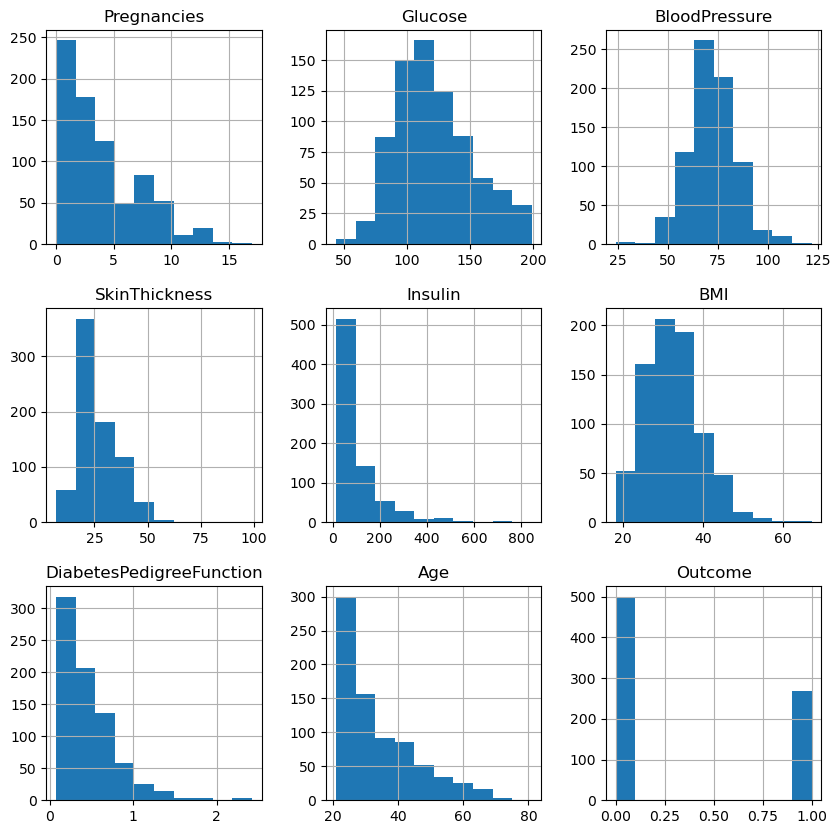

In [12]:
df.hist(bins=10,figsize=(10,10))
plt.show()

### Analysing relationships bw variables

#### Correlation analysis

In [ ]:
#get correlations of each feature in the dataset

corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(10,10))

#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
g

## Split data into X and y

In [ ]:
#separating the independent and dependent variables

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
print(X.head())
print(y.head())

## Data Standardisation - Feature Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
print(standardised_data)

X = standardised_data
y = df.Outcome
print(X)
print(y)

## Split data into training and testing data

In [ ]:
#80% is train, 20% is test
#random state is used to ensure a specific split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=7)

print(X.shape, X_train.shape, X_test.shape)

## Classification Models

### 1) Logistic Regression

In [ ]:
from sklearn.linear_model import \
LogisticRegression
lr_model = LogisticRegression\
(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)

### 2) K Neighbours Classifier

In [ ]:
from sklearn.neighbors import \
KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

### 3) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

### 4) Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

### 5) Decision tree

In [ ]:
from sklearn.tree import \
DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

### 6) Random Forest

In [ ]:
from sklearn.ensemble import \
RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
rf_model.fit(X_train, y_train)

## Predicting & Evaluating the Models

In [ ]:
#make the predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)

knn_preds = knn_model.predict(X_test)

nb_preds = nb_model.predict(X_test)

svm_preds = svm_model.predict(X_test)

dt_preds = dt_model.predict(X_test)

rf_preds = rf_model.predict(X_test)

In [ ]:
#get the accuracy of the models
print('Accuracy score of Logistic Regression:', 
      round(accuracy_score(y_test, lr_preds) * 100, 2))
print('Accuracy score of KNN:', 
      round(accuracy_score(y_test, knn_preds) * 100, 2))
print('Accuracy score of Naive Bayes:', 
      round(accuracy_score(y_test, nb_preds) * 100, 2))
print('Accuracy score of SVM:', 
      round(accuracy_score(y_test, svm_preds) * 100, 2))
print('Accuracy score of Decision Tree:', 
      round(accuracy_score(y_test, dt_preds) * 100, 2))
print('Accuracy score of Random Forest:', 
      round(accuracy_score(y_test, rf_preds) * 100, 2))

## Save the Model with the Highest Accuracy using pickle

In [ ]:
import pickle
pickle.dump(svm_model, open('svm_model.pkl', 'wb')) 
#svm has the highest accuracy